<a href="https://colab.research.google.com/github/Bu64p/TensorFlow/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

Predicting a numerical variable based on some other combination of variables.
(Predicting a number)


Second Notebook

*By Engineer *Parsa Ghafoori Sadatieh**

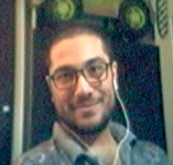

Ferdowsi universisty, Mashhad, Iran

*10/25/2024*

*8/4/1403*


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
print("TensorFlow version: ",tf.__version__)
print("Keras version: ",keras.__version__)
print("Numpy version: ",np.__version__)
print("Pandas version: ",pd.__version__)

TensorFlow version:  2.17.0
Keras version:  3.4.1
Numpy version:  1.26.4
Pandas version:  2.2.2


## Create data to view and fit

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([ 0.4604257 ,  0.514933  , -0.06519881, -1.442522  , -0.48492542,
        -1.8364043 ,  0.91463274,  0.5145402 ,  0.5517507 , -0.3741098 ,
        -0.28709963,  1.5089895 , -0.14833727, -1.2846565 ,  0.5484313 ,
         0.10596129,  0.21793836,  0.7063839 , -0.19219153,  1.1390278 ],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([  1.8434955 ,   2.8090088 ,  -0.55984807,  -8.712007  ,
         -3.7095962 , -11.757954  ,   6.5108447 ,   3.1698737 ,
          3.100461  ,  -2.1099381 ,  -2.2258332 ,   9.398625  ,
         -0.47947532,  -8.035373  ,   3.9854836 ,   0.77765197,
          2.4282649 ,   4.8997893 ,  -1.6177258 ,   7.257686  ],
       dtype=float32)>)

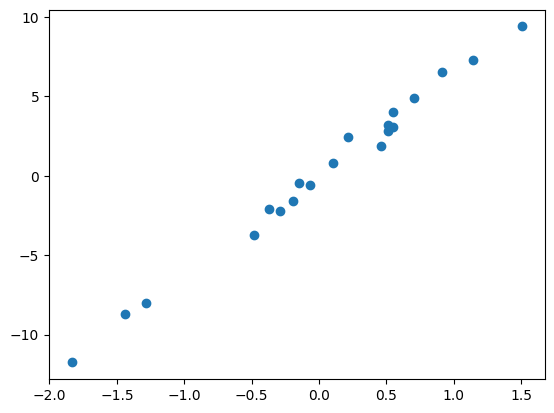

In [31]:
number_of_samples = 20
nise_offset = 0.5
# Create features
X = tf.random.Generator.from_seed(64)
X = X.normal(shape=[number_of_samples])
X = tf.cast(X, dtype=tf.float32)

# Create labels
Y = tf.random.Generator.from_seed(64)
Y = Y.normal(shape=[number_of_samples])
Y = tf.cast(Y, dtype=tf.float32)
Y = tf.multiply(Y, 6.4)

# add noise
N = tf.random.normal(shape=[number_of_samples])
N = tf.cast(N, dtype=tf.float32)
N = tf.multiply(N, nise_offset)

Y = tf.add(Y, N)

# Visualize
plt.scatter(X, Y)
X , Y

## Input & Output shapes

In [32]:
# Create a demo
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

# Check the shape
tf.shape(house_info).numpy(), tf.shape(house_price).numpy()

(array([3], dtype=int32), array([1], dtype=int32))

In [33]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

(TensorShape([20]), TensorShape([20]))

In [34]:
X.ndim, Y.ndim # so it's a scaler! (1,1)

(1, 1)

## Steps in modelling with TensorFlow



1.   Creating a model: define the input and output layers, as well as the hidden layers of a deep learning the model.

2.   Compiling a model: define the loss function (the function tell how wrong the model is) and the optimizer (tell how to improve the patterns that the model is learning) and evaluation metrics (what we can use to interpret the performance of our model).

3.  Fitting a model: letting the model try to find patterns between X & y (features and labels).

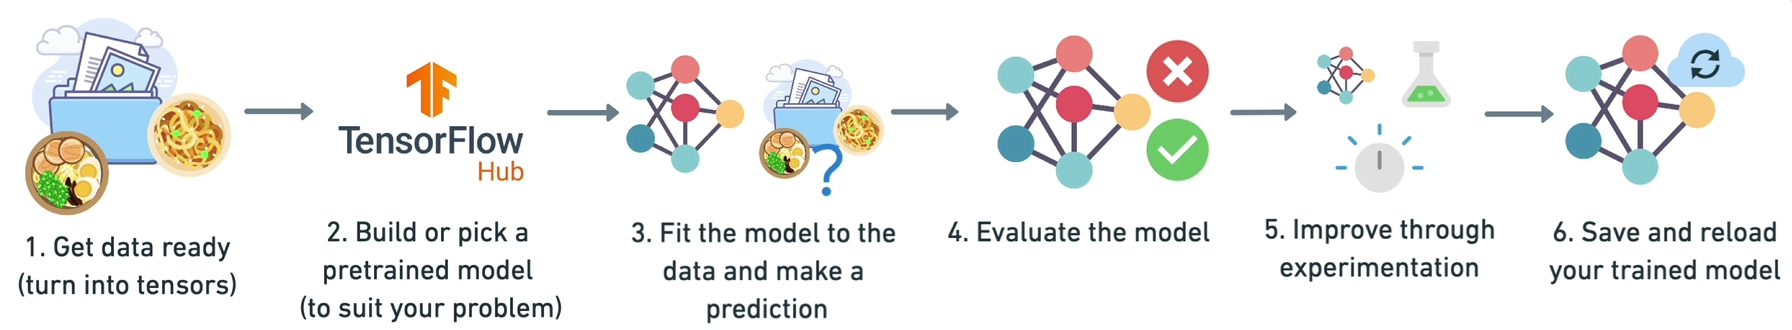


In [35]:
# Set random seed
tf.random.set_seed(64)

# 1.Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# or: model_t = tf.keras.Sequential()
#     model_t.add(tf.keras.layers.Dense(1))


# 2.Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is Mean Absolute Error
             optimizer=tf.keras.optimizers.SGD(), # sgd is Stochasitc gradient descent
              #or using: optimizer="sgd"
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5.1800 - mae: 5.1800
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.1755 - mae: 5.1755
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 5.1710 - mae: 5.1710
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.1665 - mae: 5.1665
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 5.1619 - mae: 5.1619
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.1574 - mae: 5.1574
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 5.1529 - mae: 5.1529
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 5.1484 - mae: 5.1484
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.1438 - mae: 5.1438
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 5.1393 - mae: 5.1393


> 1. MAE stands for Mean Absolute Error.
It is a metric that measures the average absolute difference between the predicted and actual values in a regression problem.


> 2. SGD stands for Stochastic Gradient Descent.
It's an optimization algorithm used to update a model's parameters during training to minimize the loss function and improve accuracy.
Instead of using the entire dataset to compute the gradient, it uses a small random subset (mini-batch) which makes it faster and more efficient for large datasets.



> 3. An epoch is one complete pass through the entire training dataset when training a machine learning model. It's like showing your model all your training data once.






In [36]:
# Try and make a predicition
#X_test = random.choice(X) # Assuming X is a list or similar iterable
#X_test = np.array([X_test])
Xi = 3
input_data = tf.expand_dims(tf.expand_dims(X[Xi], axis=0), axis=-1)
Y_pred = tf.constant(model.predict(input_data))
#print(tf.expand_dims(model.predict([X_test]),axis=-1
input_data.numpy()[0][0], Y[Xi].numpy(),Y_pred.numpy()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


(-1.442522, -8.712007, 1.8895303)

## Improving the model
Model can be improved by altering the steps of creating a model.

1. **Create a model**: Add more layers, increase the number of hiden layers, chnage the activation function of each layer.

2. **Compiling a model**: Change the optimization function or the **learning rate** of the optimization function.

3. **Fitting a model**: fit a model for more **epochs** (leave it training for longer) or on more date (give the model more example to learn from)

In [37]:
# 1.Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
               #optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               optimizer="sgd",
               metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step - loss: 4.5869 - mae: 4.5869
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 4.5823 - mae: 4.5823
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 4.5778 - mae: 4.5778
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.5733 - mae: 4.5733
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.5688 - mae: 4.5688
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.5642 - mae: 4.5642
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4.5597 - mae: 4.5597
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.5552 - mae: 4.5552
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 4.5507 - mae: 4.5507
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.5462 - mae: 4.5462
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.5416 - mae: 4.5416
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.5371 - mae: 4.5371
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/

In [38]:
# Try and make a predicition
input_data = tf.expand_dims(tf.expand_dims(X[Xi], axis=0), axis=-1)
Y_pred = tf.constant(model.predict(input_data))
#print(tf.expand_dims(model.predict([X_test]),axis=-1
input_data.numpy()[0][0], Y[Xi].numpy(),Y_pred.numpy()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(-1.442522, -8.712007, -0.17056382)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
    ])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4727 - mae: 4.4727
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.3575 - mae: 4.3575
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.2427 - mae: 4.2427
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.1280 - mae: 4.1280
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.0128 - mae: 4.0128
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.8968 - mae: 3.8968
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.7794 - mae: 3.7794
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.6603 - mae: 3.6603
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.5506 - mae: 3.5506
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.4398 - mae: 3.4398
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.3267 - mae: 3.3267
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.2110 - mae: 3.2110
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 

In [40]:
# Try and make a predicition
input_data = tf.expand_dims(tf.expand_dims(X[Xi], axis=0), axis=-1)
Y_pred = tf.constant(model.predict(input_data))
#print(tf.expand_dims(model.predict([X_test]),axis=-1
input_data.numpy()[0][0], Y[Xi].numpy(),Y_pred.numpy()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


(-1.442522, -8.712007, -9.074731)



> **Learning rate** is the most *important* hyper parameter to change!



## Evaluating a model

In practice, a typical workflow to building neural networks would be:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it ->...
```

3 words to memorize:
> "Visualize,Visualize,Visualize"

* Data, Model and Predicition

### The 3 sets...

* **Training set**: the model learns from this data, which is typically 70-80% of the total data that is available.

* **Validation set**: the model gets tuend on this data,  which is typically 10-15% of the total data that is available.

* **Test set**: the model gets evaluated on this data to set, which is typically 10-15% of the total data that is available.

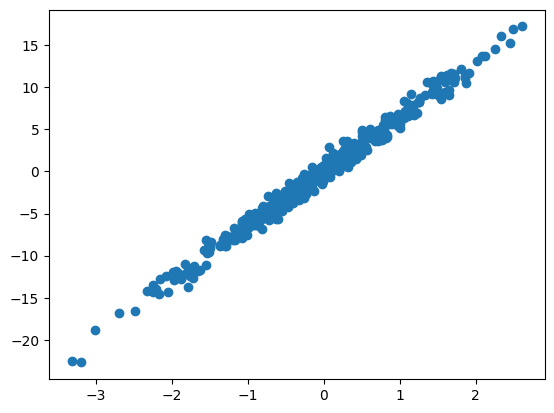

In [41]:
#Data set for testing:
number_of_samples = 400
nise_offset = 0.8
# Create features
X = tf.random.Generator.from_seed(85)
X = X.normal(shape=[number_of_samples])
X = tf.cast(X, dtype=tf.float32)

# Create labels
Y = tf.random.Generator.from_seed(85)
Y = Y.normal(shape=[number_of_samples])
Y = tf.cast(Y, dtype=tf.float32)
Y = tf.multiply(Y, 6.4)

# add noise
N = tf.random.normal(shape=[number_of_samples])
N = tf.cast(N, dtype=tf.float32)
N = tf.multiply(N, nise_offset)

Y = tf.add(Y, N)

# Visualize
plt.scatter(X, Y)


In [42]:
 #Split the data
X_train = X[:int(number_of_samples*0.8)] # 80% of data, data is random, no need to
Y_train = Y[:int(number_of_samples*0.8)]

X_test = X[int(number_of_samples*0.8):]  # 20% of data
Y_test = Y[int(number_of_samples*0.8):]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(320, 320, 80, 80)

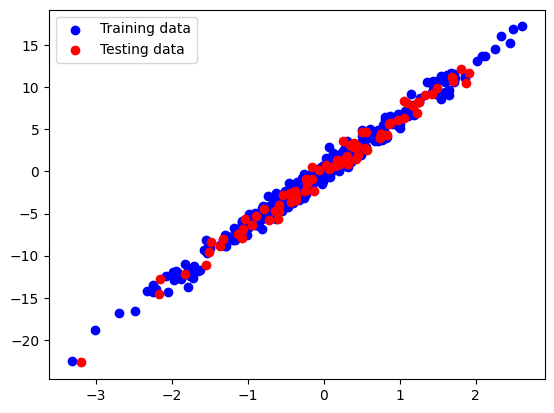

In [43]:
#plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, c="b",label="Training data")
plt.scatter(X_test,Y_test, c="r",label="Testing data")
plt.legend();

In [44]:
# 1.create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(50,name="hiden_layer1"),
    tf.keras.layers.Dense(50,name="hiden_layer2"),
    tf.keras.layers.Dense(50,name="hiden_layer3"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="My_model1")

# 2.compile th model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
               metrics=["mae"]

)
# 3.train the model
model2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=150)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.3759 - mae: 5.3759
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1885 - mae: 4.1885 
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2854 - mae: 2.2854 
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8744 - mae: 0.8744  
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6445 - mae: 0.6445  
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6221 - mae: 0.6221 
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6201 - mae: 0.6201  
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6196 - mae: 0.6196 
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6189 - mae: 0.6189 
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6133 - mae: 0.6133 
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6139 - mae: 0.6139 
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6084 - mae: 0.6084 
Epoch 13/150
10/10 ━━━━━━━━━━━━━━━━

### Visualizing the model   

In [45]:
model2.summary()

Model: "My_model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiden_layer1 (Dense)                 │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiden_layer2 (Dense)                 │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiden_layer3 (Dense)                 │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,165 (67.05 KB)

 Trainable params: 5,721 (22.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,444 (44.71 KB)

* **Total params**: total number of parameters in the model.
* **Trainable params**: number of parameters(patterns) in the model that can be trained.
* **Non-trainable params**: number of parameters in the model that cannot be trained.(Transfer Learning)

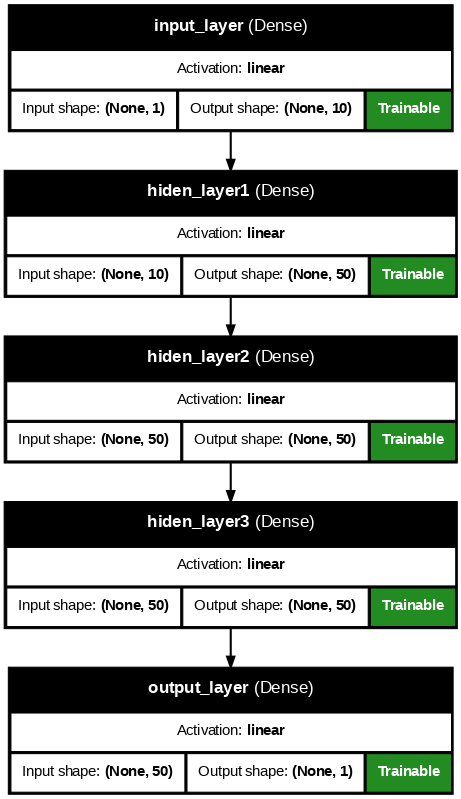

In [46]:
plot_model(model=model2,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=75,show_trainable=True,show_layer_activations=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.



In [47]:
Y_pred = model2.predict(X_test)
Y_pred , Y_test

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[ -4.034084  ],
        [  8.0824795 ],
        [  1.0303793 ],
        [ -2.4005036 ],
        [ -0.8009152 ],
        [  1.1504278 ],
        [ -1.3266373 ],
        [ -0.38344222],
        [  2.012267  ],
        [ -4.557105  ],
        [  0.46223044],
        [  4.8491154 ],
        [  5.657118  ],
        [  8.549965  ],
        [ -5.009329  ],
        [  9.563588  ],
        [ 11.999921  ],
        [  4.874743  ],
        [ 12.262048  ],
        [ -3.8422287 ],
        [  1.6438293 ],
        [ 10.929585  ],
        [ -9.6069565 ],
        [  2.0889454 ],
        [  7.935462  ],
        [  7.9753785 ],
        [ -3.35952   ],
        [  3.5732846 ],
        [  5.3340297 ],
        [  0.21553586],
        [  7.050596  ],
        [ -6.8894467 ],
        [  3.7051435 ],
        [  9.129754  ],
        [  2.4970646 ],
        [-13.833804  ],
        [  1.680743  ],
        [ -2.7123573 ],
        [  7.566818  ],
        [  2.2921875 ],
        [ -2.2785456 ],
        [-20.378

In [48]:
def plot_pred(
    train_data,
    train_labels,
    test_data,
    test_labels,
    pred):

    plt.grid(True)
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    plt.scatter(test_data,test_labels,c="r",label="Testing data")
    plt.scatter(test_data,pred,c="g",label="Predictions")
    plt.legend();
    plt.xlabel("Input data")
    plt.ylabel("Target labels")
    plt.title("Input data vs Target labels vs Predictions")



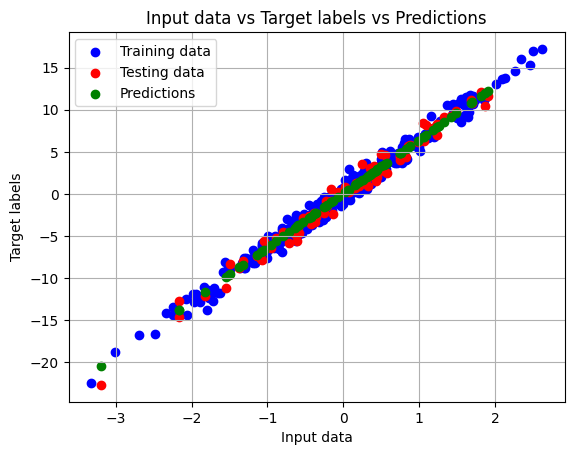

In [49]:
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=Y_pred)

### Evaluating model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


In [50]:
# evaluate the model on the test
model2.evaluate(tf.expand_dims(X_test,axis=-1),Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6447 - mae: 0.6447  


[0.6532256603240967, 0.6532256603240967]

In [51]:
Y_pred.shape , Y_test.shape

((80, 1), TensorShape([80]))

In [52]:
# calculate mae
#Y_pred=tf.squeeze(Y_pred) # there is a extra dimension!
tf.keras.losses.MAE(y_true=Y_test,y_pred=tf.squeeze(Y_pred)).numpy()

0.65322566

In [53]:
# calculate mse
tf.keras.losses.MSE(y_true=Y_test,y_pred=tf.squeeze(Y_pred)).numpy()

0.677238

In [54]:
def mae(y_true,y_pred):
    return tf.keras.losses.MAE(y_true=Y_test,y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true,y_pred):
    return tf.keras.losses.MSE(y_true=Y_test,y_pred=tf.squeeze(y_pred)).numpy()


### Running experiments to improve our model

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`

1. **Get more data**: get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. **Make your model larger (using a more complex model)**:this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer**: give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

*   `model_1` - same as the original model, 1 layer, trained for 100 epochs
*  `model_2` - 2 layers, trained for 100 epochs
* `model_3` - 2 layers, trained for 900 epochs


## **Build `model_1`**

In [55]:
# 1. create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. train the model
model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1715 - mae: 6.1715  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1032 - mae: 6.1032 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0349 - mae: 6.0349 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9666 - mae: 5.9666 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8983 - mae: 5.8983  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8300 - mae: 5.8300 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7617 - mae: 5.7617  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6935 - mae: 5.6935  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6253 - mae: 5.6253 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5570 - mae: 5.5570  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4888 - mae: 5.4888  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4205 - mae: 5.4205 
Epoch 13/100
10/10 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


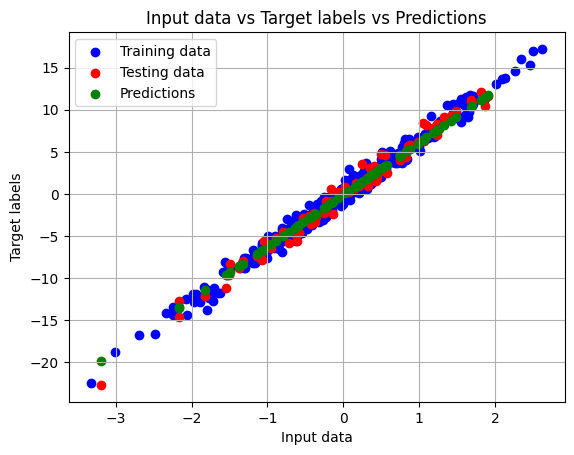

In [56]:
y_pred_1 = model_1.predict(X_test)
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=y_pred_1)

In [57]:
# calculate model 1 evaluation metrics
mae_1 = mae(Y_test,y_pred_1)
mse_1 = mse(Y_test,y_pred_1)
mae_1,mse_1

(0.6919292, 0.76453173)

**Build `model_2`**

* 2 dense layers, traind for 100 epochs

In [58]:
# 1. create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# 3. train the model
model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0534 - mse: 57.3162  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9520 - mse: 55.4238 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8645 - mse: 53.8166 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7885 - mse: 52.4413 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7221 - mse: 51.2539 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6635 - mse: 50.2173 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6112 - mse: 49.3006 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5637 - mse: 48.4764  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5198 - mse: 47.7209  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4783 - mse: 47.0130 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4382 - mse: 46.3334 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3984 - mse: 45.6637 
Epoch 13/1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


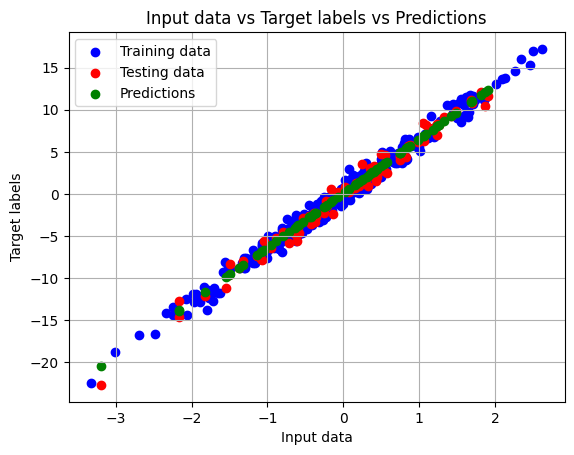

In [59]:
 y_pred_2 = model_2.predict(X_test)
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=y_pred_2)

In [60]:
mae_2 = mae(Y_test,y_pred_2)
mse_2 = mse(Y_test,y_pred_2)
mae_2,mse_2

(0.6515323, 0.6790311)

**Build `model_3`**

* 2 dense layers, traind for 500 epochs

In [61]:
# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# 3. train the model
model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)#900)



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2933 - mse: 29.0354  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0950 - mse: 26.4536 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8625 - mse: 23.5802 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5923 - mse: 20.4415  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2771 - mse: 17.0689 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9124 - mse: 13.5313 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4916 - mse: 9.9588  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0154 - mse: 6.5755 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4864 - mse: 3.6573 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9785 - mse: 1.6199 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6962 - mse: 0.7546  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6279 - mse: 0.6058 
Epoch 13/100
10

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


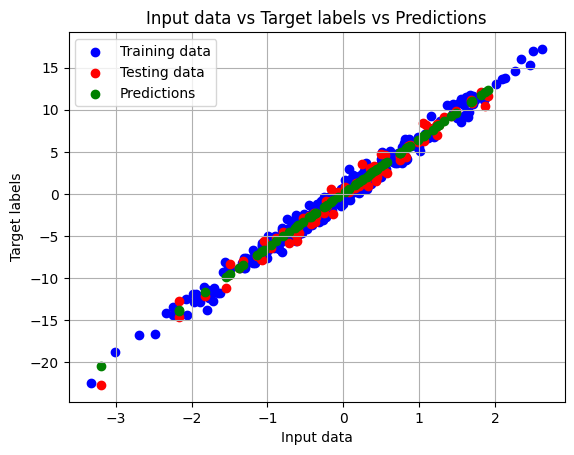

In [62]:
 y_pred_3 = model_3.predict(X_test)
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=y_pred_3)

In [63]:
mae_3 = mae(Y_test,y_pred_3)
mse_3 = mse(Y_test,y_pred_3)
mae_3,mse_3

(0.6517237, 0.6795221)

# Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [64]:
model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]

all_results = pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
all_results

,Model,MAE,MSE
0,model_1,0.691929,0.764532
1,model_2,0.651532,0.679031
2,model_3,0.651724,0.679522


 Looks like `model_2` performed the best...

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: **"experiment, experiment, experiment"**.

## Save the models

Saving the models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format


In [65]:
# save the model using the SaveModel format
model_2.save("Best_Model_SM.keras")

In [66]:
# save the model using the HDF5 format
model_2.save("Best_Model_HDF5.h5")

## Loading in a saved model

In [67]:
loaded_SM = tf.keras.models.load_model("/content/Best_Model_SM.keras")
loaded_SM.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [68]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [69]:
# Compare m2 w/ sm format
model_2_pred = model_2.predict(X_test)
loaded_SM_pred = loaded_SM.predict(X_test)
model_2_pred == loaded_SM_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [70]:
loaded_H5 = tf.keras.models.load_model("/content/Best_Model_HDF5.h5")
loaded_H5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [72]:
# Compare m2 w/ h5 format
model_2_pred = model_2.predict(X_test)
loaded_H5_pred = loaded_H5.predict(X_test)
model_2_pred == loaded_H5_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

 ## A larger example

In [73]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [75]:
oh_data = pd.get_dummies(insurance,dtype=int)

In [76]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
x_data = oh_data.drop("charges",axis=1)
y_data = oh_data["charges"]

In [78]:
x_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=64)
len(x_data),len(x_train),len(x_test)

(1338, 1070, 268)

In [80]:
# create a model
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_a.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["mae"]
)

# train the model
model_a.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13021.6143 - mae: 13021.6143
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13011.2998 - mae: 13011.2998 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12999.8252 - mae: 12999.8252 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12985.8320 - mae: 12985.8320
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12968.5879 - mae: 12968.5879
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12947.6055 - mae: 12947.6055
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12922.5000 - mae: 12922.5000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12893.0049 - mae: 12893.0049
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12858.9512 - mae: 12858.9512
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12820.2666 - mae: 12820.2666
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12776.9365 - mae: 12776.9365 
Epoch 12/100
34/34 ━━━━━━━━

In [81]:
model_a.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6617.1777 - mae: 6617.1777  


[6984.8984375, 6984.8984375]

In [82]:
y_train.mean(),y_train.median()

(13415.346024886916, 9565.00995)

It looks like the model is not performing well...
Let's try and improve it!

To (try) improve the model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use Adam optimizer
2. train for longer

In [83]:
# create a model
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_b.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["mae"]
)

# train the model
model_b.fit(x_train,y_train,epochs=150, verbose = 1)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12958.9336 - mae: 12958.9336
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12783.6582 - mae: 12783.6582
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12427.8330 - mae: 12427.8330
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11729.0674 - mae: 11729.0674
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10565.5146 - mae: 10565.5146
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9104.8828 - mae: 9104.8828 
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7835.2163 - mae: 7835.2163
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7282.9785 - mae: 7282.9785
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7204.2998 - mae: 7204.2998
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7184.4067 - mae: 7184.4067
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7159.3545 - mae: 7159.3545
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [84]:
model_b.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3236.1492 - mae: 3236.1492  


[3336.481689453125, 3336.481689453125]

In [85]:
model_a.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6617.1777 - mae: 6617.1777 


[6984.8984375, 6984.8984375]

In [86]:
# create a model
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compile the model
model_c.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# fit the model
history = model_c.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13002.2363 - mae: 13002.2363
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12891.5693 - mae: 12891.5693
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12648.6357 - mae: 12648.6357 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12140.5605 - mae: 12140.5605
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11223.0264 - mae: 11223.0264
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9878.4092 - mae: 9878.4092
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8431.2227 - mae: 8431.2227
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7463.9121 - mae: 7463.9121
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7221.6274 - mae: 7221.6274
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7199.1016 - mae: 7199.1016
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7176.5269 - mae: 7176.5269
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [87]:
model_c.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3206.6367 - mae: 3206.6367  


[3271.16796875, 3271.16796875]

In [88]:
model_b.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3236.1492 - mae: 3236.1492 


[3336.481689453125, 3336.481689453125]

Text(0.5, 0, 'epochs')

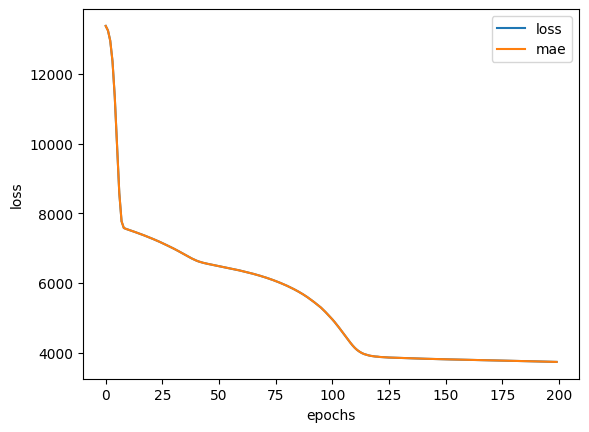

In [89]:
# plot history (aka a loss curve or a learning curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


> 🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

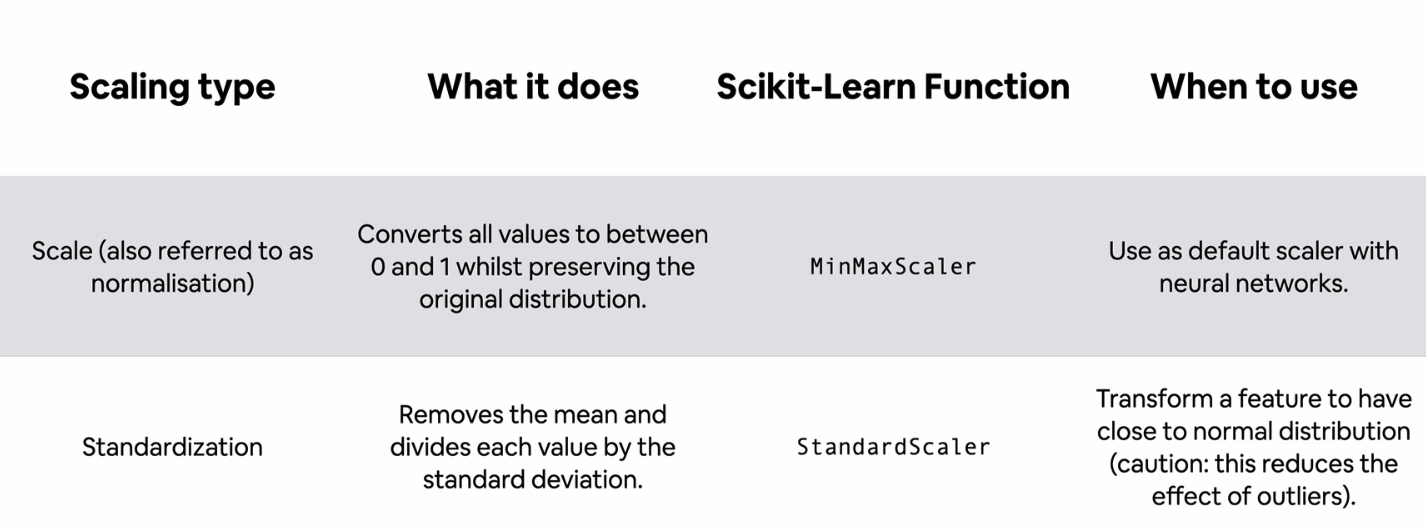

In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

# read in insurance dataframe
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer (
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# create x & y

x = df.drop("charges",axis=1)
y = df["charges"]

# build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=64)

# fit the column transformer to our training data
ct.fit(x_train)

# transform training and test data with the column transformer
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [92]:
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [93]:
x_train_normal[0]

array([0.04347826, 0.63061609, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        ])

In [94]:
x_train.shape , x_train_normal.shape

((1070, 6), (1070, 11))

In [95]:
# create a model
model_d = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# compile the model
model_d.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# fit the model

history = model_d.fit(x_train_normal,
            y_train,
            epochs=500,
            validation_data=(x_test_normal,y_test),
            callbacks=[early_stopping]
)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13012.9717 - mae: 13012.9717 - val_loss: 12684.7402 - val_mae: 12684.7402
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13004.5576 - mae: 13004.5576 - val_loss: 12667.6572 - val_mae: 12667.6572
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12982.9941 - mae: 12982.9941 - val_loss: 12629.2539 - val_mae: 12629.2539
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12937.5791 - mae: 12937.5791 - val_loss: 12558.9736 - val_mae: 12558.9736
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12857.8652 - mae: 12857.8652 - val_loss: 12446.4590 - val_mae: 12446.4590
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12733.5859 - mae: 12733.5859 - val_loss: 12281.5254 - val_mae: 12281.5254
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12554.6436 - mae: 12554.6436 - val_loss: 12054.1592 - val_mae: 12054.1592
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12311.1289

In [96]:
model_d.evaluate(x_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3153.4341 - mae: 3153.4341 


[3034.74951171875, 3034.74951171875]

Text(0.5, 0, 'epochs')

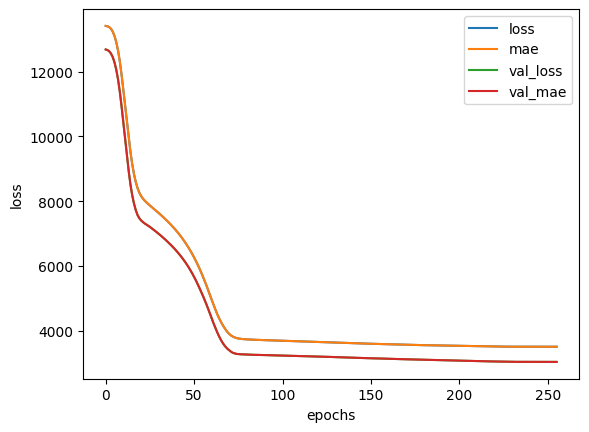

In [97]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Exercise:

## Boston Housing Dataset Explanation

### What is it?

> The Boston Housing dataset is a collection of data points about housing prices in Boston, Massachusetts. Each data point represents a different area within Boston and contains 13 features describing the area's characteristics (like crime rate, pollution levels, average number of rooms in houses, etc.) along with the median house price for that area.

### Why is it used?

> It's a classic dataset used in machine learning for regression tasks. Regression means predicting a continuous value (like price) based on other information. We use this dataset to train machine learning models to predict house prices based on the 13 features.

### Important Features:

* **CRIM**: Crime rate in the area
* **RM**: Average number of rooms per house
* **AGE**: Proportion of older houses
* **TAX**: Property tax rate
* **LSTAT**: Percentage of lower-income residents
* **MEDV** (Target): Median house price (what we're trying to predict)

### Regression with Boston Housing: In Short

1. ***Load the data***: Import the dataset using `tf.keras.datasets.boston_housing.load_data()`
2. ***Prepare the data***: Ensure the data is in the correct format for your model (like scaling values).
3. ***Create a model***: Build a regression model using TensorFlow/Keras (e.g., a neural network).
4. ***Train the model***: Feed the model the training data (features and prices) so it can learn patterns.
5. ***Evaluate the model***: Test the model on unseen data to see how accurately it predicts house prices.



In [98]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install livelossplot
from livelossplot import PlotLossesKeras
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [100]:
# create x & y
x = df.drop("medv",axis=1)
y = df["medv"]
# build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=64)

# let's normalize the data
ct = make_column_transformer(
    (MinMaxScaler(),["crim","zn","indus","chas","nox","age","dis","rad","tax","ptratio","b","lstat"]),# turn all values in these columns between 0 & 1
)
# fit the column transformer to our training data
ct.fit(x_train)

# transform training and test data with the column transformer
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

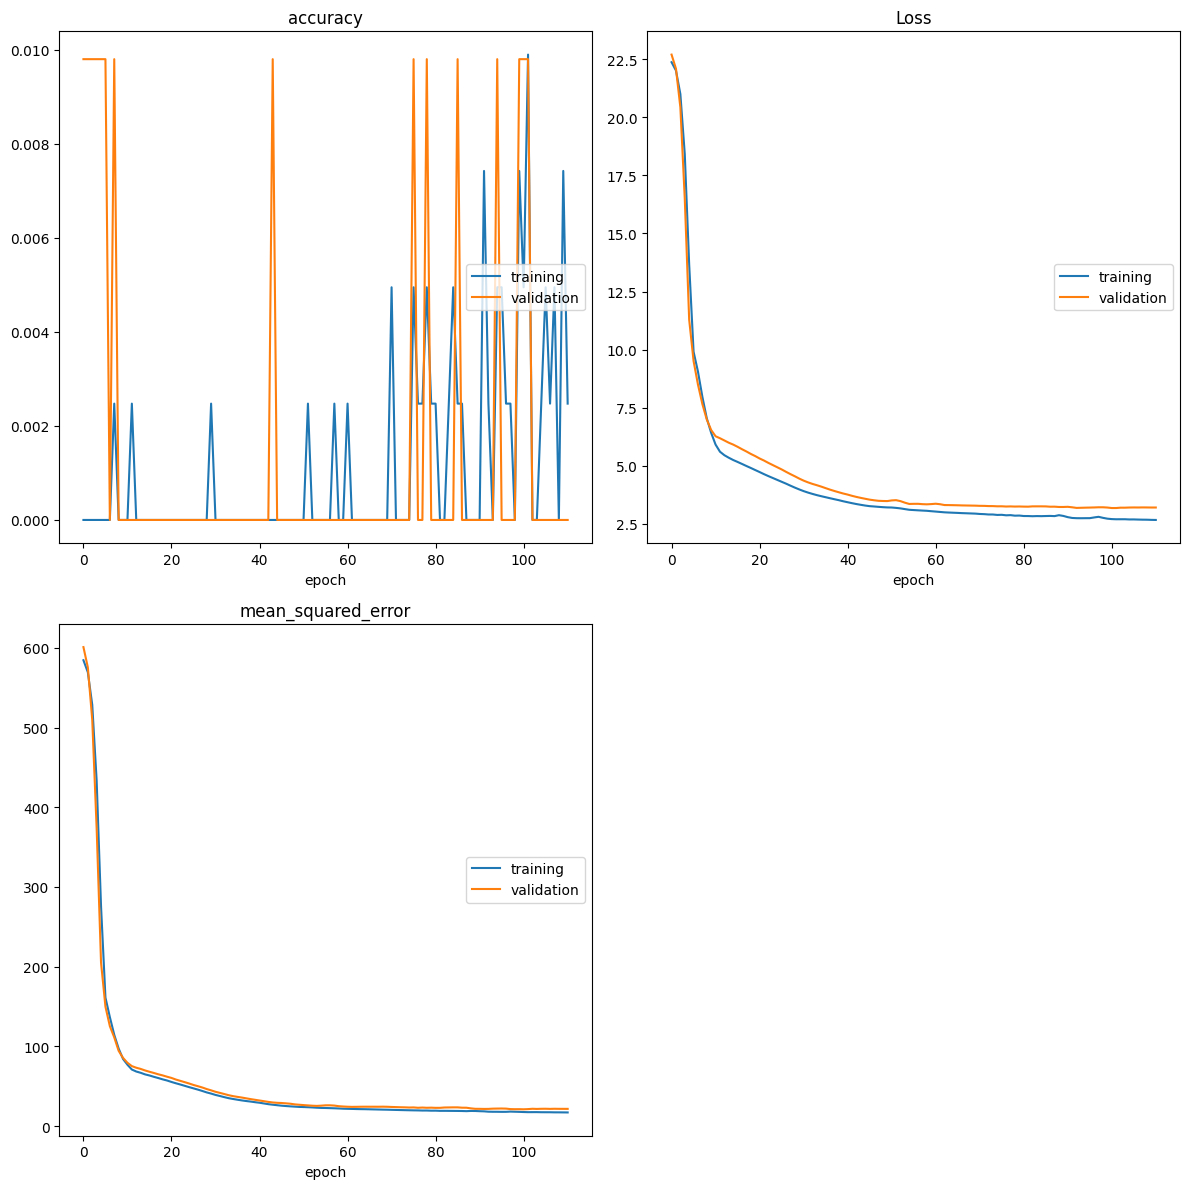

accuracy
	training         	 (min:    0.000, max:    0.010, cur:    0.002)
	validation       	 (min:    0.000, max:    0.010, cur:    0.000)
Loss
	training         	 (min:    2.672, max:   22.367, cur:    2.672)
	validation       	 (min:    3.186, max:   22.695, cur:    3.208)
mean_squared_error
	training         	 (min:   17.047, max:  584.550, cur:   17.047)
	validation       	 (min:   21.015, max:  601.015, cur:   21.546)
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 7.4254e-04 - loss: 2.6115 - mean_squared_error: 17.0405 - val_accuracy: 0.0000e+00 - val_loss: 3.2079 - val_mean_squared_error: 21.5461


In [101]:
# create a model
model_e = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='linear')
])

# compile the model
model_e.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy', 'mean_squared_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# train the model
history = model_e.fit(x_train_normal,
                      y_train, epochs=500,
                      validation_data=(x_test_normal, y_test),
                      callbacks=[early_stopping,PlotLossesKeras()])

In [102]:
model_e.evaluate(x_test_normal,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.0805 - mean_squared_error: 20.1572 


[3.207878351211548, 0.0, 21.54605484008789]

Text(0.5, 0, 'epochs')

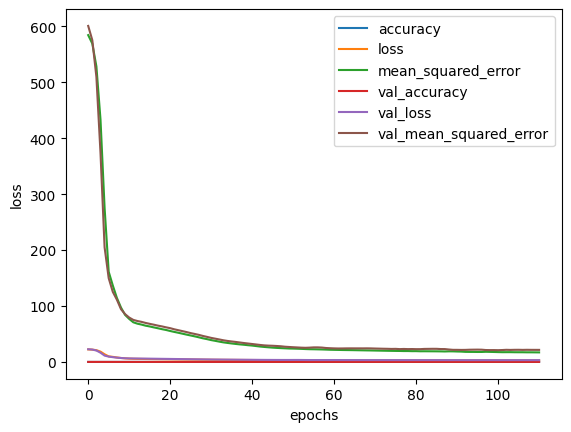

In [103]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [104]:
model_e.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 100)                 │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,502 (251.96 KB)

 Trainable params: 21,500 (83.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,002 (167.98 KB)

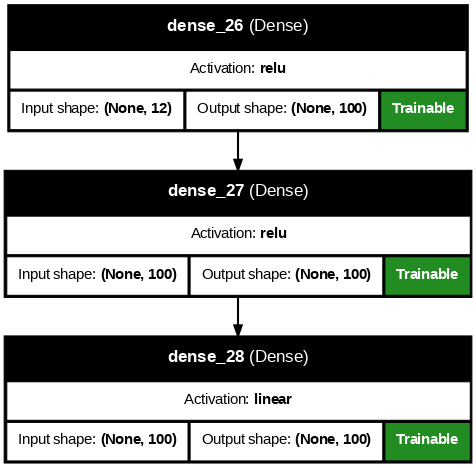

In [105]:
plot_model(model=model_e,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=75,show_trainable=True,show_layer_activations=True)

In [106]:
model_e.save("BostonHousing.h5")